In [212]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [213]:

def simulate(n_play, initial_balance):
    balance_array = []
    balance_array.append(initial_balance)
    balance = initial_balance
    for i in range(n_play):   
        choice = np.random.choice([0,1], p=[0.52,0.48])
        if choice == 0:
            balance -= 20
        else:
            balance += 20
        balance_array.append(balance)
    return balance_array

n_play = 100
initial_balance = 1000



In [214]:
n_simulation = 1000
df = pd.DataFrame()
for i in range(n_simulation):
    df[i] = simulate(n_simulation, initial_balance)

In [215]:
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,980,1020,1020,1020,980,1020,1020,980,980,980,...,980,1020,980,1020,1020,1020,980,1020,980,980
2,960,1000,1040,1000,1000,1000,1040,960,960,960,...,960,1000,960,1040,1000,1000,1000,1000,960,1000
3,940,1020,1020,1020,1020,980,1020,980,940,940,...,980,980,980,1060,1020,980,980,1020,940,1020
4,960,1040,1000,1000,1000,960,1000,960,920,960,...,1000,1000,1000,1040,1000,960,960,1000,960,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,520,-560,520,1480,1040,-720,-840,-720,-120,1760,...,360,-560,-720,800,520,-360,1040,400,0,160
997,540,-540,500,1500,1020,-740,-820,-700,-140,1740,...,380,-540,-700,780,500,-340,1060,380,-20,140
998,560,-520,520,1520,1000,-760,-800,-680,-160,1720,...,400,-560,-680,800,480,-320,1080,360,0,120
999,540,-500,540,1540,1020,-780,-820,-700,-180,1700,...,420,-580,-660,780,500,-340,1060,380,-20,100


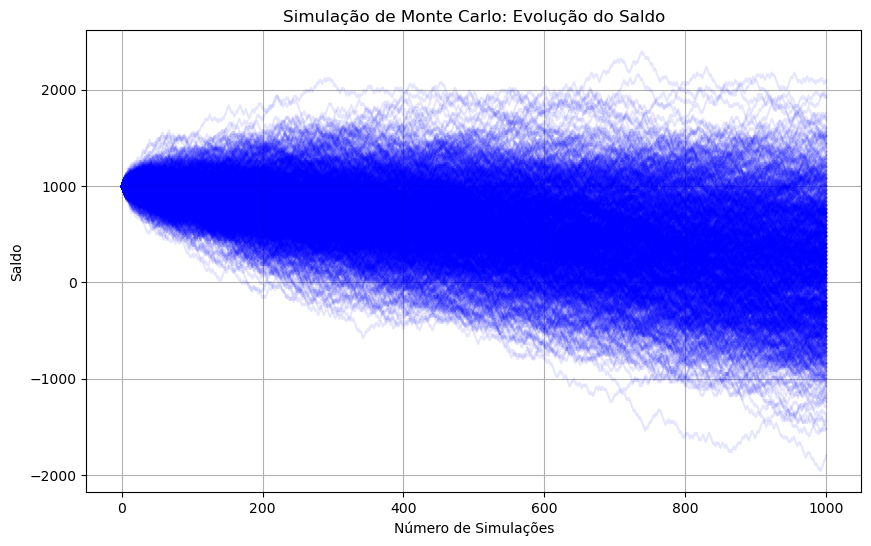

In [216]:
# Plotagem do gráfico de linha
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], alpha=0.1, color='blue')  # Alpha controla a transparência das linhas

plt.title('Simulação de Monte Carlo: Evolução do Saldo')
plt.xlabel('Número de Simulações')
plt.ylabel('Saldo')
plt.grid(True)
plt.show()

In [217]:
win = df.iloc[-1] > initial_balance
win_rate = win.value_counts()[True] / n_simulation
print(f'Probabilidade de ganhar dinheiro: {win_rate}')

Probabilidade de ganhar dinheiro: 0.087


In [218]:
porcetange = (df.iloc[-1] - initial_balance) / initial_balance * 100


In [219]:
win.value_counts()

False    913
True      87
Name: 1000, dtype: int64

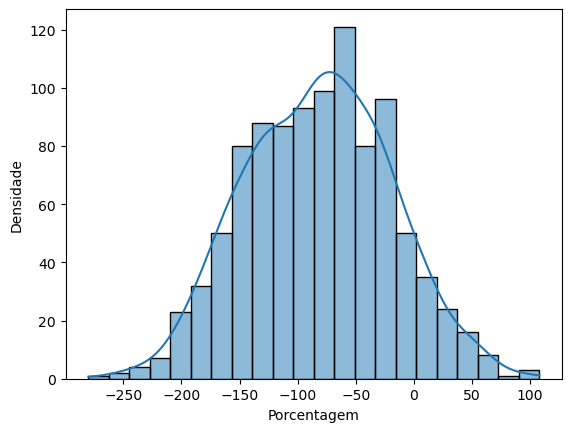

In [220]:
fig = sns.histplot(porcetange, kde=True)
fig.set(xlabel='Porcentagem', ylabel='Densidade')
ax = fig.axes